In [1]:
#debut de la run
#charge les données
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
from torchvision import transforms
import numpy as np

class PKLVideoDataset(Dataset):
    def __init__(self, x_files, y_files, transform=None, target_frames=16):
        self.videos = []
        self.labels = []
        self.transform = transform
        self.target_frames = target_frames

        # Charger tous les fichiers Pickle
        for xf, yf in zip(x_files, y_files):
            with open(xf, "rb") as f:
                self.videos.extend(pickle.load(f))
            with open(yf, "rb") as f:
                self.labels.extend(pickle.load(f))

    def __len__(self):
        return len(self.videos)

    def __getitem__(self, idx):
        video = self.videos[idx]
        label = self.labels[idx]

        # Convertir BGR → RGB
        frames = [cv2.cvtColor(f, cv2.COLOR_BGR2RGB) for f in video]

        # Ajuster à target_frames
        if len(frames) < self.target_frames:
            repeat_factor = int(np.ceil(self.target_frames / len(frames)))
            frames = (frames * repeat_factor)[:self.target_frames]
        else:
            frames = frames[:self.target_frames]

        # Appliquer transform
        if self.transform:
            frames = [self.transform(f) for f in frames]

        # Empiler : (C, T, H, W)
        video_tensor = torch.stack(frames, dim=1)
        return video_tensor, torch.tensor(label, dtype=torch.long)

#les fichiers 7 sont pour la validation
x_files = [
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_train1_small3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_train2_small3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_train3_small3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_train4_small3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_train5_small3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_train6_small3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_train8_small3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_train7_small3.pkl",

]
y_files = [
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_train1.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_train2.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_train3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_train4.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_train5.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_train6.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_train8.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_train7.pkl",
]
# Fichiers de validation
x_val_files = [
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_val1_small3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_val2_small3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_val3_small3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_val4_small3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_val5_small3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_val6_small3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_val8_small3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/X_val7_small3.pkl",

]
y_val_files = [
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_val1.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_val2.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_val3.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_val4.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_val5.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_val6.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_val8.pkl",
    "/content/drive/MyDrive/Projet non-alternant/Vidéo/ensemble_non_hasard/y_val7.pkl",

]


transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((112, 112)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.43216, 0.394666, 0.37645],
                         std=[0.22803, 0.22145, 0.216989]),
])
from google.colab import drive

# ============================================================
# 2️⃣ MONTAGE DU DRIVE ET CHARGEMENT DU DATAFRAME
# ============================================================
drive.mount("/content/drive", force_remount=True)
train_dataset = PKLVideoDataset(x_files, y_files, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)

# Création du Dataset et DataLoader pour validation
val_dataset = PKLVideoDataset(x_val_files, y_val_files, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2)

Mounted at /content/drive


In [ ]:
print(len(train_dataset))
print(len(val_dataset))

6509
497


In [2]:
def same_seeds(seed):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

same_seeds(42)

In [3]:
#entrainement du modèle
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
from torchvision import transforms
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.cuda.amp import autocast, GradScaler
class R2Plus1D_Custom(nn.Module):
    def __init__(self, num_classes=20, dropout_p=0.5):
        super().__init__()
        # Charger le backbone pré-entraîné
        self.backbone = models.video.r2plus1d_18(
            weights=models.video.R2Plus1D_18_Weights.KINETICS400_V1
        )
        in_features = self.backbone.fc.in_features

        # Remplacer la tête de classification
        self.backbone.fc = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_p),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)

# ============================================================
# 🔹 ENTRAÎNEMENT
# ============================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = R2Plus1D_Custom(num_classes=20, dropout_p=0.3).to(device)

optimizer = optim.AdamW(model.parameters(), lr=1.8e-5, weight_decay=1.8e-3)

criterion = nn.CrossEntropyLoss()
scaler = GradScaler()

model_path = "/content/drive/MyDrive/Projet non-alternant/Vidéo/old_r2.pth"
num_epoch = 10
best_acc = 0.0
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epoch)
train_acc_list, val_acc_list, train_loss_list, val_loss_list = [], [], [], []

for epoch in range(num_epoch):
    model.train()
    running_train_loss, running_train_correct, total_train = 0.0, 0, 0

    for videos, labels in tqdm(train_loader, desc=f"Époque {epoch+1}/{num_epoch}"):
        videos, labels = videos.to(device), labels.to(device)
        optimizer.zero_grad()

        with autocast():
            outputs = model(videos)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_train_loss += loss.item()
        preds = outputs.argmax(1)
        running_train_correct += (preds == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_train_loss / len(train_loader)
    train_acc = running_train_correct / total_train

    # ---- Validation ----
    model.eval()
    running_val_loss, running_val_correct, total_val = 0.0, 0, 0
    with torch.no_grad():
        for videos, labels in val_loader:
            videos, labels = videos.to(device), labels.to(device)
            with autocast():
                outputs = model(videos)
                loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            preds = outputs.argmax(1)
            running_val_correct += (preds == labels).sum().item()
            total_val += labels.size(0)

    val_loss = running_val_loss / len(val_loader)
    val_acc = running_val_correct / total_val

    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)

    print(f"📊 [Époque {epoch+1}/{num_epoch}] "
          f"Train Acc: {train_acc:.4f} | Train Loss: {train_loss:.4f} | "
          f"Val Acc: {val_acc:.4f} | Val Loss: {val_loss:.4f}")
    scheduler.step()
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), model_path)
        print(f"💾 Nouveau meilleur modèle sauvegardé avec Val Acc = {best_acc:.4f}")

Downloading: "https://download.pytorch.org/models/r2plus1d_18-91a641e6.pth" to /root/.cache/torch/hub/checkpoints/r2plus1d_18-91a641e6.pth


100%|██████████| 120M/120M [00:00<00:00, 184MB/s]
/tmp/ipython-input-3922547868.py:49: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Époque 1/10:   0%|          | 0/745 [00:00<?, ?it/s]/tmp/ipython-input-3922547868.py:65: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Époque 1/10: 100%|██████████| 745/745 [03:59<00:00,  3.11it/s]
/tmp/ipython-input-3922547868.py:87: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


📊 [Époque 1/10] Train Acc: 0.2724 | Train Loss: 2.5303 | Val Acc: 0.4268 | Val Loss: 2.0221
💾 Nouveau meilleur modèle sauvegardé avec Val Acc = 0.4268


Époque 2/10: 100%|██████████| 745/745 [03:58<00:00,  3.12it/s]


📊 [Époque 2/10] Train Acc: 0.4298 | Train Loss: 2.0000 | Val Acc: 0.4791 | Val Loss: 1.8390
💾 Nouveau meilleur modèle sauvegardé avec Val Acc = 0.4791


Époque 3/10: 100%|██████████| 745/745 [03:58<00:00,  3.13it/s]


📊 [Époque 3/10] Train Acc: 0.5280 | Train Loss: 1.6444 | Val Acc: 0.4990 | Val Loss: 1.7484
💾 Nouveau meilleur modèle sauvegardé avec Val Acc = 0.4990


Époque 4/10: 100%|██████████| 745/745 [03:58<00:00,  3.13it/s]


📊 [Époque 4/10] Train Acc: 0.6344 | Train Loss: 1.3158 | Val Acc: 0.5266 | Val Loss: 1.7164
💾 Nouveau meilleur modèle sauvegardé avec Val Acc = 0.5266


Époque 5/10: 100%|██████████| 745/745 [03:58<00:00,  3.13it/s]


📊 [Époque 5/10] Train Acc: 0.7237 | Train Loss: 1.0176 | Val Acc: 0.5304 | Val Loss: 1.7263
💾 Nouveau meilleur modèle sauvegardé avec Val Acc = 0.5304


Époque 6/10:  19%|█▊        | 139/745 [00:45<03:17,  3.07it/s]


KeyboardInterrupt: 

🔍 Démarrage du LR Finder...


/tmp/ipython-input-3168600603.py:28: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Batch 20/744, LR=0.000001, Loss=3.0374
Batch 40/744, LR=0.000001, Loss=3.0197
Batch 60/744, LR=0.000002, Loss=3.0126
Batch 80/744, LR=0.000002, Loss=3.0162
Batch 100/744, LR=0.000003, Loss=3.0120
Batch 120/744, LR=0.000003, Loss=2.9874
Batch 140/744, LR=0.000004, Loss=2.9969
Batch 160/744, LR=0.000004, Loss=2.9822
Batch 180/744, LR=0.000005, Loss=2.9724
Batch 200/744, LR=0.000006, Loss=2.9629
Batch 220/744, LR=0.000008, Loss=2.9505
Batch 240/744, LR=0.000009, Loss=2.9400
Batch 260/744, LR=0.000011, Loss=2.9283
Batch 280/744, LR=0.000013, Loss=2.9148
Batch 300/744, LR=0.000016, Loss=2.9012
Batch 320/744, LR=0.000020, Loss=2.8581
Batch 340/744, LR=0.000023, Loss=2.8502
Batch 360/744, LR=0.000028, Loss=2.8172
Batch 380/744, LR=0.000034, Loss=2.7804
Batch 400/744, LR=0.000041, Loss=2.7826
Batch 420/744, LR=0.000049, Loss=2.7049
Batch 440/744, LR=0.000059, Loss=2.7027
Batch 460/744, LR=0.000072, Loss=2.6286
Batch 480/744, LR=0.000086, Loss=2.5537
Batch 500/744, LR=0.000104, Loss=2.5430
Batc

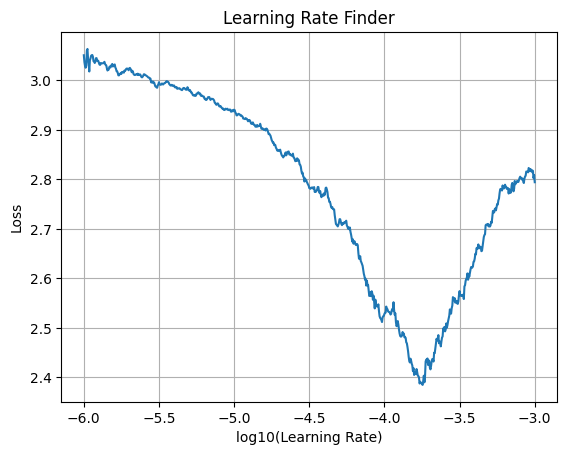

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.cuda.amp import autocast

def find_best_lr(model, train_loader, optimizer, criterion, device, init_lr=1e-6, final_lr=1e-3, beta=0.98):
    """
    Trouve le meilleur learning rate avec la méthode de Leslie Smith
    """
    num = len(train_loader) - 1
    mult = (final_lr / init_lr) ** (1/num)
    lr = init_lr
    optimizer.param_groups[0]['lr'] = lr

    avg_loss = 0.0
    best_loss = 0.0
    batch_num = 0
    losses = []
    log_lrs = []

    model.train()

    print("🔍 Démarrage du LR Finder...")
    for inputs, labels in train_loader:
        batch_num += 1
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        with autocast():
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        avg_loss = beta * avg_loss + (1 - beta) * loss.item()
        smoothed_loss = avg_loss / (1 - beta ** batch_num)

        if batch_num > 1 and smoothed_loss > 4 * best_loss:
            break

        if smoothed_loss < best_loss or batch_num == 1:
            best_loss = smoothed_loss

        losses.append(smoothed_loss)
        log_lrs.append(torch.log10(torch.tensor(lr)))

        loss.backward()
        optimizer.step()

        lr *= mult
        optimizer.param_groups[0]['lr'] = lr

        if batch_num % 20 == 0:
            print(f"Batch {batch_num}/{num}, LR={lr:.6f}, Loss={smoothed_loss:.4f}")

    print("✅ LR Finder terminé !")

    # Tracer la courbe
    plt.plot(log_lrs, losses)
    plt.xlabel("log10(Learning Rate)")
    plt.ylabel("Loss")
    plt.title("Learning Rate Finder")
    plt.grid(True)
    plt.show()

model = R2Plus1D_Custom(num_classes=20, dropout_p=0.3).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6)  # valeur de départ
criterion = nn.CrossEntropyLoss()

find_best_lr(model, train_loader, optimizer, criterion, device)


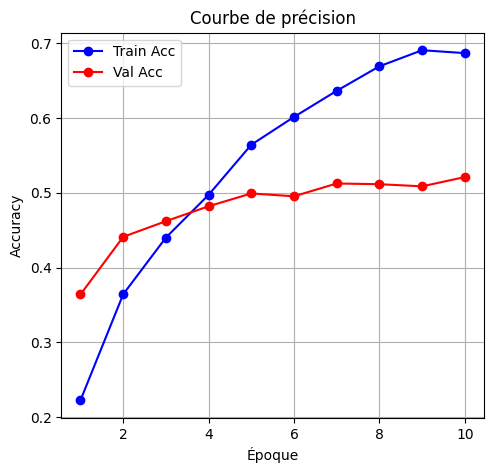

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epoch + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
# Calculate accuracy for each epoch
train_acc_epochs = [acc for acc in train_acc_list]
val_acc_epochs = [acc for acc in val_acc_list]

plt.plot(epochs, train_acc_epochs, 'b-o', label='Train Acc')
plt.plot(epochs, val_acc_epochs, 'r-o', label='Val Acc')
plt.title('Courbe de précision')
plt.xlabel('Époque')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)



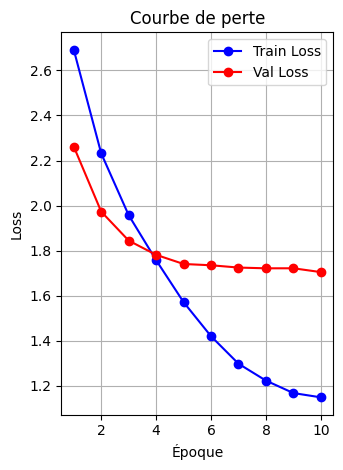

In [ ]:
# Loss
plt.subplot(1,2,2)
# Calculate average loss per batch for each epoch
train_loss_epochs = [loss for loss in train_loss_list]
val_loss_epochs = [loss  for loss in val_loss_list]

plt.plot(epochs, train_loss_epochs, 'b-o', label='Train Loss')
plt.plot(epochs, val_loss_epochs, 'r-o', label='Val Loss')
plt.title('Courbe de perte')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()